<a href="https://colab.research.google.com/github/shuchimishra/Tensorflow_projects/blob/main/Tensorflow_Code/NLP/exam/Category4_Sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%matplotlib inline
%config InlineBackend.fugure_format = 'retina'
def plot_loss_acc(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc      = history.history[     'accuracy' ]
  val_acc  = history.history[ 'val_accuracy' ]
  loss     = history.history[    'loss' ]
  val_loss = history.history['val_loss' ]
  epochs   = range(len(acc)) # Get number of epochs
  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot  ( epochs,     acc, label='Training accuracy' )
  plt.plot  ( epochs, val_acc, label='Validation accuracy' )
  plt.title ('Training and validation accuracy')
  plt.grid()
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.figure()
  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot  ( epochs,     loss, label='Training loss' )
  plt.plot  ( epochs, val_loss, label='Validation loss' )
  plt.grid()
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title ('Training and validation loss'   )

Epoch 1/50
610/625 [============================>.] - ETA: 0s - loss: 0.6856 - accuracy: 0.5600
Epoch 1: val_accuracy improved from -inf to 0.56327, saving model to bestmodel.h5
625/625 [==============================] - 13s 14ms/step - loss: 0.6855 - accuracy: 0.5603 - val_loss: 0.6800 - val_accuracy: 0.5633 - lr: 0.0011
Epoch 2/50
625/625 [==============================] - ETA: 0s - loss: 0.6020 - accuracy: 0.6619
Epoch 2: val_accuracy improved from 0.56327 to 0.75570, saving model to bestmodel.h5
625/625 [==============================] - 3s 4ms/step - loss: 0.6020 - accuracy: 0.6619 - val_loss: 0.4977 - val_accuracy: 0.7557 - lr: 0.0011
Epoch 3/50
620/625 [============================>.] - ETA: 0s - loss: 0.4467 - accuracy: 0.7892
Epoch 3: val_accuracy improved from 0.75570 to 0.79013, saving model to bestmodel.h5
625/625 [==============================] - 3s 5ms/step - loss: 0.4469 - accuracy: 0.7886 - val_loss: 0.4480 - val_accuracy: 0.7901 - lr: 0.0011
Epoch 4/50
613/625 [======

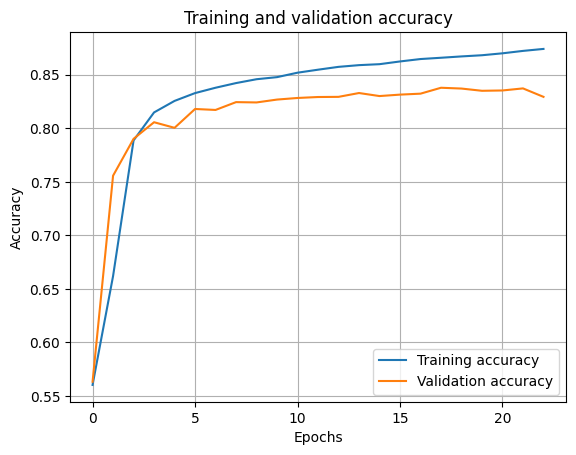

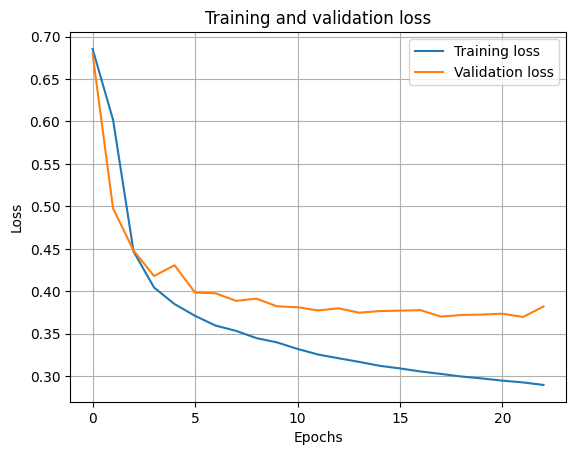

In [2]:
# ======================================================================
# There are 5 questions in this exam with increasing difficulty from 1-5.
# Please note that the weight of the grade for the question is relative
# to its difficulty. So your Category 1 question will score significantly
# less than your Category 5 question.
#
# Don't use lambda layers in your model.
# You do not need them to solve the question.
# Lambda layers are not supported by the grading infrastructure.
#
# You must use the Submit and Test button to submit your model
# at least once in this category before you finally submit your exam,
# otherwise you will score zero for this category.
# ======================================================================
#
# NLP QUESTION
#
# Build and train a classifier for the sarcasm dataset.
# The classifier should have a final layer with 1 neuron activated by sigmoid as shown.
# It will be tested against a number of sentences that the network hasn't previously seen
# and you will be scored on whether sarcasm was correctly detected in those sentences.

import json
import tensorflow as tf
from tensorflow import keras
import numpy as np
import urllib
from keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass


def solution_model():
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/sarcasm.json'
    urllib.request.urlretrieve(url, 'sarcasm.json')

    # DO NOT CHANGE THIS CODE OR THE TESTS MAY NOT WORK
    vocab_size = 1000
    embedding_dim = 16
    max_length = 120
    trunc_type='post'
    padding_type='post'
    oov_tok = "<OOV>"
    training_size = 20000

    sentences = []
    labels = []

    # YOUR CODE HERE
    # Load the JSON file
    with open("./sarcasm.json", 'r') as f:
      datastore = json.load(f)

    # Collect sentences and labels into the lists
    for item in datastore:
      sentences.append(item['headline'])
      labels.append(item['is_sarcastic'])

    # Split the sentences
    training_sentences = sentences[:training_size]
    testing_sentences = sentences[training_size:]

    # Split the labels
    training_labels = labels[:training_size]
    testing_labels = labels[training_size:]

    # Initialize the Tokenizer class
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

    # Generate the word index dictionary
    tokenizer.fit_on_texts(training_sentences)
    word_index = tokenizer.word_index

    # Generate and pad the training sequences
    training_sequences = tokenizer.texts_to_sequences(training_sentences)
    training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    # Generate and pad the testing sequences
    testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
    testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    # Convert the labels lists into numpy arrays
    training_labels = np.array(training_labels)
    testing_labels = np.array(testing_labels)

    #just clean the sessio, recomendable if we execute some times the model.
    keras.backend.clear_session()

    # This callback saves the best model based in val_accuracy
    MCP = keras.callbacks.ModelCheckpoint(filepath='bestmodel.h5', monitor='val_accuracy', mode='auto', save_best_only=True, save_weights_only=False, verbose=1)
    RLP = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=5, verbose=1, mode="auto", min_lr=0.000000001, cooldown=7)
    ES = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=5, verbose=1) #min_delta=1e-4,


    model = tf.keras.Sequential([
        # YOUR CODE HERE. KEEP THIS OUTPUT LAYER INTACT OR TESTS MAY FAIL
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Conv1D(16, 4 ,activation='relu'),
        tf.keras.layers.GlobalAveragePooling1D(),
        # tf.keras.layers.Dropout(0.01),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001060442967229987), metrics=['accuracy'])

    num_epochs = 50
    history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1, callbacks=[MCP, RLP, ES])

    model.evaluate(testing_padded, testing_labels)

    # Plot training results
    plot_loss_acc(history)

    return model



# Note that you'll need to save your model as a .h5 like this.
# When you press the Submit and Test button, your saved .h5 model will
# be sent to the testing infrastructure for scoring
# and the score will be returned to you.
if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")

